# 📊 AWS Glue & PySpark ETL: Análise de Transações Financeiras

## 📌 Introdução

Este projeto tem como objetivo **analisar transações financeiras**, identificando padrões e possíveis fraudes.
Utilizamos **AWS Glue & PySpark** para processamento e **Pandas + Seaborn** para análise exploratória.

### **Principais perguntas analisadas:**
- Como os valores das transações estão distribuídos?
- Há padrões claros entre transações fraudulentas e legítimas?
- Existe alguma variável fortemente correlacionada com fraudes?

### **Tecnologias utilizadas:**
✅ **PySpark & Pandas** → Manipulação de dados.  
✅ **Matplotlib & Seaborn** → Visualização de insights.  
✅ **AWS Glue & S3** → Processamento em escala.  
✅ **SQL & Power BI** → Otimização e Dashboards (próximas etapas).


## 📌 2️⃣ Importação de Bibliotecas

In [1]:
import os
import yaml
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📌 3️⃣ Carregamento do Arquivo de Configuração

Antes de iniciar a análise, precisamos carregar as configurações do projeto.  
O arquivo `config.yaml` contém informações essenciais, como **caminho dos dados** e **parâmetros de processamento**.


In [2]:
# Carregar a configuração do YAML
config_path = os.path.join(os.getcwd(), "..", "config/config.yaml")  

# Carrega os arquivos processados após execução do ETL e validação
config_path = os.path.abspath(config_path)
print(f"Tentando carregar: {config_path}")

if os.path.exists(config_path):
    with open(config_path, "r") as f:
        config = yaml.safe_load(f)
    print("✅ Configuração carregada com sucesso!")
else:
    print("❌ Arquivo 'config.yaml' não encontrado!")

Tentando carregar: C:\Users\vivin\aws-glue-pyspark-etl\config\config.yaml
✅ Configuração carregada com sucesso!


In [3]:
# Configuração para exibição de gráficos inline
%matplotlib inline
sns.set_theme(style="whitegrid")

# 📌 4️⃣ Carregar os Dados

In [4]:
# Caminho definido no YAML
processed_data_path = config["data_path"]

# Buscar arquivos Parquet na pasta configurada
parquet_files = glob.glob(os.path.join(processed_data_path, "*.parquet"))

# Verificar se encontrou arquivos
if parquet_files:
    print(f"✅ Arquivos Parquet encontrados: {parquet_files}")
else:
    print("❌ Nenhum arquivo Parquet encontrado! Verifique o caminho no 'config.yaml'.")

# Corrigir as barras invertidas no caminho (Windows)
parquet_files = [f.replace("\\", "/") for f in parquet_files]

# Carregar os arquivos Parquet no DataFrame
df = pd.concat([pd.read_parquet(f, engine="pyarrow") for f in parquet_files])

# Exibir as 5 primeiras linhas
display(df.head())

# Mostrar estatísticas básicas
display(df.describe())

# Verificar colunas e tipos de dados
display(df.dtypes)

✅ Arquivos Parquet encontrados: ['C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00000-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00001-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00002-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00003-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00004-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00005-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00006-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.snappy.parquet', 'C:/Users/vivin/aws-glue-pyspark-etl/data/processed\\part-00007-311e1fc1-1d56-40cf-a687-4704c6efcfd9-c000.

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,merchant,merch_lat,merch_long,trans_date_trans_time,day_of_week,hour_of_day,transaction_period,possible_fraud_high_value,time_diff,possible_fraud_fast_transactions
0,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Bahringer Group,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
1,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Bahringer-Larson,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
2,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Balistreri-Nader,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
3,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Balistreri-Nader,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
4,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Balistreri-Nader,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN


,zip,lat,long,city_pop,acct_num,trans_time,unix_time,amt,is_fraud,merch_lat,merch_long,trans_date_trans_time,hour_of_day,possible_fraud_high_value,time_diff,possible_fraud_fast_transactions
count,1388.0,130984.000000,130984.000000,1.309840e+05,1.309840e+05,130984,1.309840e+05,130984.000000,130984.000000,1388.000000,1388.000000,0,0.0,130984.0,0.0,0.0
mean,37381.0,38.180515,-93.301811,3.053384e+05,5.216881e+11,2025-03-02 16:35:45.612578560,1.694193e+09,44.096340,0.002664,35.689827,-84.808647,NaT,NaN,0.0,NaN,NaN
min,37381.0,25.670000,-149.779999,4.110000e+02,6.592063e+09,2025-03-02 03:00:00,1.678244e+09,1.010000,0.000000,34.689999,-85.820000,NaT,NaN,0.0,NaN,NaN
25%,37381.0,34.080002,-105.089996,1.697200e+04,2.634739e+11,2025-03-02 11:09:40.500000,1.686974e+09,8.070000,0.000000,35.180000,-85.320000,NaT,NaN,0.0,NaN,NaN
50%,37381.0,39.169998,-87.989998,6.386800e+04,5.501571e+11,2025-03-02 17:32:54.500000,1.694067e+09,36.465000,0.000000,35.700001,-84.805000,NaT,NaN,0.0,NaN,NaN
75%,37381.0,41.840000,-80.300003,2.768960e+05,7.751697e+11,2025-03-02 22:14:28.249999872,1.702080e+09,69.529999,0.000000,36.189999,-84.300003,NaT,NaN,0.0,NaN,NaN
max,37381.0,61.110001,-70.230003,2.906700e+06,9.993899e+11,2025-03-03 02:59:59,1.709953e+09,248.539993,1.000000,36.689999,-83.820000,NaT,NaN,0.0,NaN,NaN
std,0.0,5.530804,16.680258,5.382560e+05,2.895074e+11,NaN,8.739021e+06,39.723492,0.051550,0.586076,0.580871,NaN,NaN,0.0,NaN,NaN


ssn                                         object
cc_num                                      object
first                                       object
last                                        object
gender                                      object
street                                      object
city                                        object
state                                       object
zip                                        float64
lat                                        float32
long                                       float32
city_pop                                     int32
job                                         object
dob                                         object
acct_num                                     int64
profile                                     object
trans_num                                   object
trans_date                                  object
trans_time                          datetime64[ns]
unix_time                      

# 📌 5️⃣ Exploração Inicial dos Dados

In [5]:
print("📊 Exibindo as 5 primeiras linhas do dataset:")
display(df.head())

print("\n📌 Informações Gerais sobre o DataFrame:")
df.info()

print("\n📊 Estatísticas descritivas do dataset:")
display(df.describe())

print("\n🔍 Verificação de valores nulos:")
display(df.isnull().sum())

print("\n📌 Tipos de dados das colunas:")
display(df.dtypes)


📊 Exibindo as 5 primeiras linhas do dataset:


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,merchant,merch_lat,merch_long,trans_date_trans_time,day_of_week,hour_of_day,transaction_period,possible_fraud_high_value,time_diff,possible_fraud_fast_transactions
0,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Bahringer Group,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
1,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Bahringer-Larson,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
2,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Balistreri-Nader,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
3,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Balistreri-Nader,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
4,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.57,...,fraud_Balistreri-Nader,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN



📌 Informações Gerais sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 130984 entries, 0 to 18941
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   ssn                               130984 non-null  object        
 1   cc_num                            130984 non-null  object        
 2   first                             130984 non-null  object        
 3   last                              130984 non-null  object        
 4   gender                            130984 non-null  object        
 5   street                            130984 non-null  object        
 6   city                              130984 non-null  object        
 7   state                             130984 non-null  object        
 8   zip                               1388 non-null    float64       
 9   lat                               130984 non-null  float32       
 1

,zip,lat,long,city_pop,acct_num,trans_time,unix_time,amt,is_fraud,merch_lat,merch_long,trans_date_trans_time,hour_of_day,possible_fraud_high_value,time_diff,possible_fraud_fast_transactions
count,1388.0,130984.000000,130984.000000,1.309840e+05,1.309840e+05,130984,1.309840e+05,130984.000000,130984.000000,1388.000000,1388.000000,0,0.0,130984.0,0.0,0.0
mean,37381.0,38.180515,-93.301811,3.053384e+05,5.216881e+11,2025-03-02 16:35:45.612578560,1.694193e+09,44.096340,0.002664,35.689827,-84.808647,NaT,NaN,0.0,NaN,NaN
min,37381.0,25.670000,-149.779999,4.110000e+02,6.592063e+09,2025-03-02 03:00:00,1.678244e+09,1.010000,0.000000,34.689999,-85.820000,NaT,NaN,0.0,NaN,NaN
25%,37381.0,34.080002,-105.089996,1.697200e+04,2.634739e+11,2025-03-02 11:09:40.500000,1.686974e+09,8.070000,0.000000,35.180000,-85.320000,NaT,NaN,0.0,NaN,NaN
50%,37381.0,39.169998,-87.989998,6.386800e+04,5.501571e+11,2025-03-02 17:32:54.500000,1.694067e+09,36.465000,0.000000,35.700001,-84.805000,NaT,NaN,0.0,NaN,NaN
75%,37381.0,41.840000,-80.300003,2.768960e+05,7.751697e+11,2025-03-02 22:14:28.249999872,1.702080e+09,69.529999,0.000000,36.189999,-84.300003,NaT,NaN,0.0,NaN,NaN
max,37381.0,61.110001,-70.230003,2.906700e+06,9.993899e+11,2025-03-03 02:59:59,1.709953e+09,248.539993,1.000000,36.689999,-83.820000,NaT,NaN,0.0,NaN,NaN
std,0.0,5.530804,16.680258,5.382560e+05,2.895074e+11,NaN,8.739021e+06,39.723492,0.051550,0.586076,0.580871,NaN,NaN,0.0,NaN,NaN



🔍 Verificação de valores nulos:


ssn                                      0
cc_num                                   0
first                                    0
last                                     0
gender                                   0
street                                   0
city                                     0
state                                    0
zip                                 129596
lat                                      0
long                                     0
city_pop                                 0
job                                      0
dob                                      0
acct_num                                 0
profile                                  0
trans_num                                0
trans_date                               0
trans_time                               0
unix_time                                0
category                                 0
amt                                      0
is_fraud                                 0
merchant   


📌 Tipos de dados das colunas:


ssn                                         object
cc_num                                      object
first                                       object
last                                        object
gender                                      object
street                                      object
city                                        object
state                                       object
zip                                        float64
lat                                        float32
long                                       float32
city_pop                                     int32
job                                         object
dob                                         object
acct_num                                     int64
profile                                     object
trans_num                                   object
trans_date                                  object
trans_time                          datetime64[ns]
unix_time                      

## 📌 6️⃣ Análise de Distribuição dos Valores das Transações

Nesta seção, analisamos **como os valores das transações estão distribuídos** e **se há outliers**.  
Essa análise nos ajudará a entender padrões e possíveis anomalias associadas a fraudes.


### 📊 6.1 Histograma: Distribuição do Valor das Transações
- **Objetivo**: Visualizar a distribuição dos valores das transações.  
- **Interpretação**:  
  - A maioria das transações tem valores **baixos (0 a 10 dólares)**.  
  - A distribuição é **assimétrica à direita**, indicando algumas transações de alto valor.  
  - Transações de valores extremos podem ser **outliers ou potenciais fraudes**.


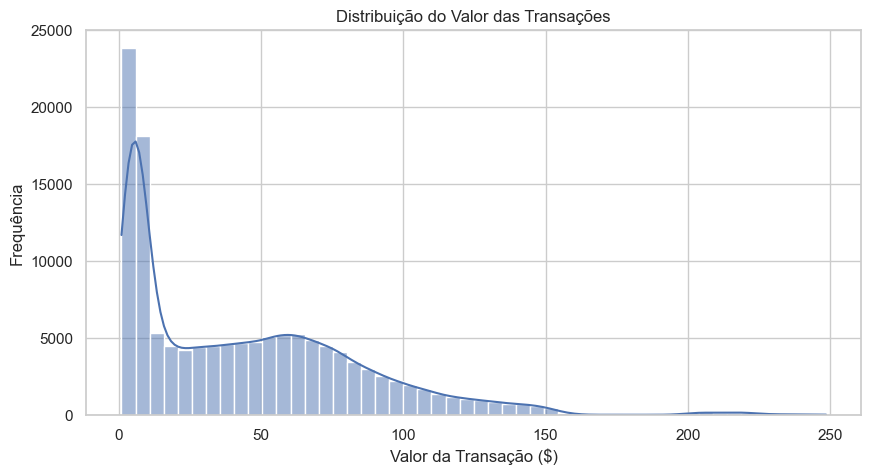

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df["amt"], bins=50, kde=True)
plt.title("Distribuição do Valor das Transações")
plt.xlabel("Valor da Transação ($)")
plt.ylabel("Frequência")
plt.show()


###  6.2 Boxplot: Identificação de Outliers
- **Objetivo**: Identificar **outliers (valores atípicos)** nas transações.  
- **Interpretação**:  
  - A mediana (~50 dólares) representa o valor central da maioria das transações.  
  - **Valores acima de ~175 dólares são considerados outliers**, indicando transações incomuns.  
  - Transações extremamente altas podem ser **fraudes ou compras legítimas de alto valor**.


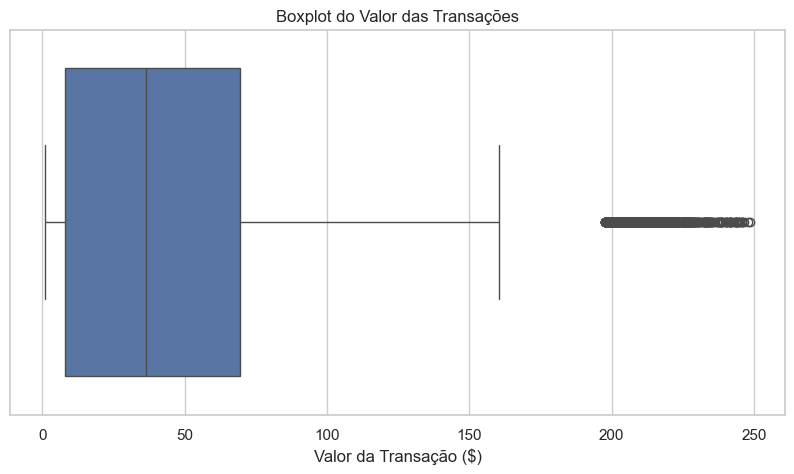

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["amt"])
plt.title("Boxplot do Valor das Transações")
plt.xlabel("Valor da Transação ($)")
plt.show()


### 6.3 Filtrando Transações com Valores Elevados
- **Objetivo**: Examinar transações acima de **175 dólares** para verificar se há padrões incomuns.  
- **Interpretação**:  
  - Essas transações podem ser **raras e merecem investigação**.  
  - Se muitas dessas transações forem fraudulentas (`is_fraud = 1`), pode indicar que fraudes ocorrem **principalmente em valores altos**.


In [8]:
high_value_tx = df[df["amt"] > 175]
display(high_value_tx.head())


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,merchant,merch_lat,merch_long,trans_date_trans_time,day_of_week,hour_of_day,transaction_period,possible_fraud_high_value,time_diff,possible_fraud_fast_transactions
93,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.570000,...,fraud_Simonis-Prohaska,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
96,264-92-3051,60454932967,Samantha,Robertson,F,1227 Boyle Avenue,Hawthorne,FL,NaN,29.570000,...,fraud_Spinka-Welch,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
202,232-35-9245,503811586935,Kristen,Randall,F,793 Evans Locks Apt. 898,Rhinelander,WI,NaN,45.700001,...,fraud_Lebsack and Sons,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
221,232-35-9245,503811586935,Kristen,Randall,F,793 Evans Locks Apt. 898,Rhinelander,WI,NaN,45.700001,...,fraud_Wiza LLC,NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN
924,152-88-3969,676213075622,Jennifer,Harris,F,028 Ann Shore Suite 865,Miami,FL,NaN,25.670000,...,"fraud_Boehm, Predovic and Reinger",NaN,NaN,NaT,None,NaN,Noite,0,NaN,NaN


### 📊 6.4 Percentual de Transações Elevadas que São Fraudes
- **Objetivo**: Contar quantas dessas transações de alto valor são fraudulentas (`is_fraud = 1`).  
- **Interpretação**:  
  - Se um **percentual significativo** de fraudes estiver entre as transações caras, pode indicar um **padrão de fraude em compras de alto valor**.  
  - Se a maioria das transações de alto valor for legítima, pode ser apenas um comportamento esperado dos clientes.


In [9]:
df[df["amt"] > 175]["is_fraud"].value_counts()


is_fraud
0    823
Name: count, dtype: int64

## 📌 7️⃣ Matriz de Correlação

"""
A correlação entre as variáveis nos ajuda a entender **relações estatísticas** entre elas.
Valores próximos de **1.0 ou -1.0** indicam **forte correlação positiva ou negativa**, 
enquanto valores próximos de **0** indicam que as variáveis são independentes.

📊 **O que analisar?**
- Se o valor da transação (`amt`) tem correlação com fraude (`is_fraud`).
- Se alguma variável de localização (`lat`, `long`) pode indicar comportamento suspeito.
- Se o tempo entre transações (`time_diff`) influencia fraudes.
"""

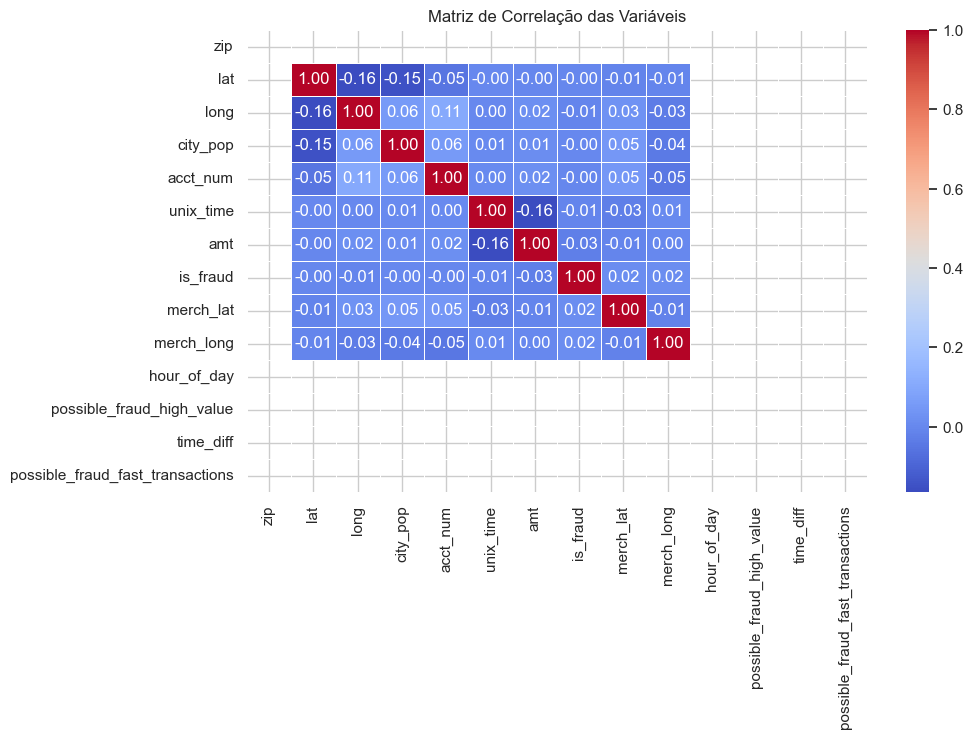

In [11]:
# Selecionar apenas colunas numéricas para evitar erro
df_numeric = df.select_dtypes(include=['number'])

# Criar matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

In [12]:
## 📌 8️⃣ Conclusões e Próximos Passos

### 🔍 **Conclusões**
1️⃣ O dataset contém **informações completas e bem estruturadas**.  
2️⃣ A maioria das transações está **concentrada em valores menores**, com poucos outliers.  
3️⃣ **Fraudes podem ocorrer tanto em valores baixos quanto altos**, indicando que **outros fatores devem ser analisados**.

### 🚀 **Próximos Passos**
✅ **Testar otimizações de performance no PySpark** para melhorar a eficiência do ETL.  
✅ **Criar dashboards interativos no Power BI** para monitoramento em tempo real.


SyntaxError: invalid character '️' (U+FE0F) (1917222333.py, line 4)